# EDA for the TRUE NEWS data Set

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# Load the dataset
data = pd.read_csv(r'D:\Important Documents\Infosys Spring Boot Internship\Boosting Financial Market Stabality With Fake News Detection\artifacts\True.csv')

In [7]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   


In [8]:
# Display basic information about the dataset
print("\nBasic Information:")
print(data.info())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
None


In [9]:
# Display summary statistics of the dataset
print("\nSummary Statistics:")
print(data.describe(include='all'))


Summary Statistics:
                                                    title  \
count                                               21417   
unique                                              20826   
top     Factbox: Trump fills top jobs for his administ...   
freq                                                   14   

                                                     text       subject  \
count                                               21417         21417   
unique                                              21192             2   
top     (Reuters) - Highlights for U.S. President Dona...  politicsNews   
freq                                                    8         11272   

                      date  
count                21417  
unique                 716  
top     December 20, 2017   
freq                   182  


In [10]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
title      0
text       0
subject    0
date       0
dtype: int64


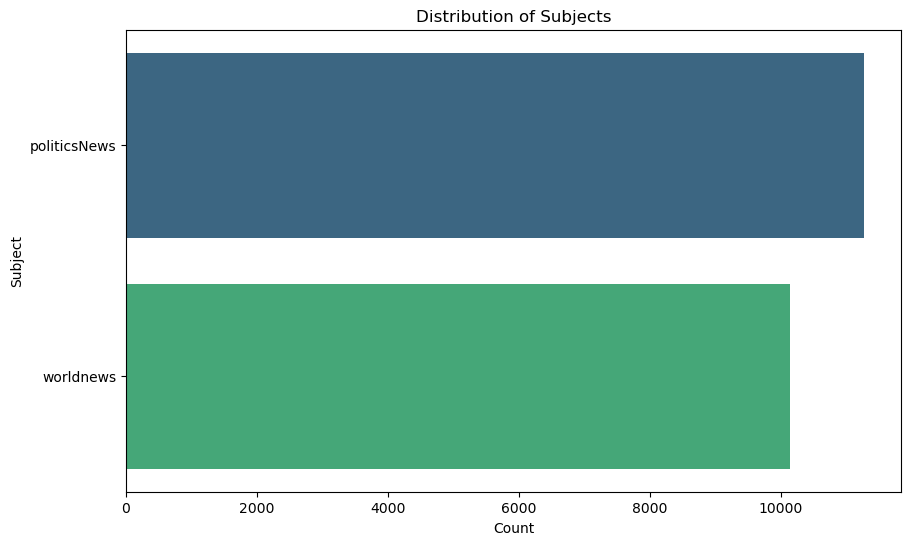

In [11]:
# Distribution of subjects
plt.figure(figsize=(10,6))
sns.countplot(y='subject', data=data, palette='viridis')
plt.title('Distribution of Subjects')
plt.xlabel('Count')
plt.ylabel('Subject')
plt.show()

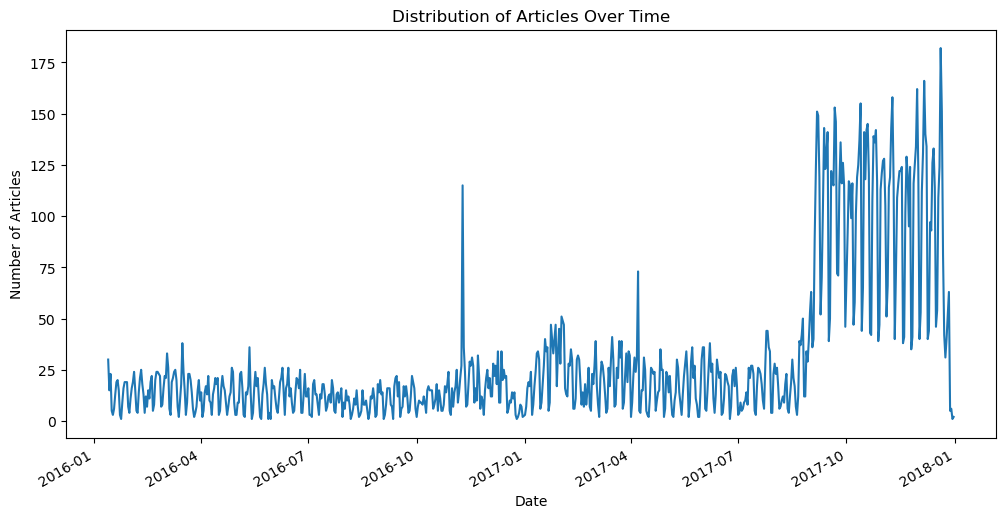

In [14]:
# Distribution of articles over time
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month

plt.figure(figsize=(12,6))
data['date'].value_counts().sort_index().plot()
plt.title('Distribution of Articles Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

In [21]:
# Cramér's V function
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# Calculate Cramér's V for 'subject' and 'title'
cramers_v_value = cramers_v(data['subject'], data['title'])
print(f"\nCramér's V between 'subject' and 'title': {cramers_v_value}")

# Chi-square test
contingency_table = pd.crosstab(data['subject'], data['title'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"\nChi-square test between 'subject' and 'title': chi2={chi2}, p={p}")


Cramér's V between 'subject' and 'title': 0.9866130802805333

Chi-square test between 'subject' and 'title': chi2=20847.42281315881, p=0.454976500274438


In [22]:
# Create a contingency table
contingency_table = pd.crosstab(data['subject'], data['title'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

Contingency Table:
title         "It would be huge": U.S. border town confronts possible import tax  \
subject                                                                            
politicsNews                                                  1                    
worldnews                                                     0                    

title         "Make Republicans Whole Again!" A divided party struggles to rally behind Trump  \
subject                                                                                         
politicsNews                                                  1                                 
worldnews                                                     0                                 

title         "Nobody stood with the Kurds" says bitter Barzani  \
subject                                                           
politicsNews                                                  0   
worldnews                                             

# EDA for the FAKE NEWS dataset

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# Load the dataset
data = pd.read_csv(r'D:\Important Documents\Infosys Spring Boot Internship\Boosting Financial Market Stabality With Fake News Detection\artifacts\Fake.csv')

In [24]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  


In [25]:
# Display basic information about the dataset
print("\nBasic Information:")
print(data.info())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None


In [26]:
# Display summary statistics of the dataset
print("\nSummary Statistics:")
print(data.describe(include='all'))


Summary Statistics:
                                                    title   text subject  \
count                                               23481  23481   23481   
unique                                              17903  17455       6   
top     MEDIA IGNORES Time That Bill Clinton FIRED His...           News   
freq                                                    6    626    9050   

                date  
count          23481  
unique          1681  
top     May 10, 2017  
freq              46  


In [27]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
title      0
text       0
subject    0
date       0
dtype: int64


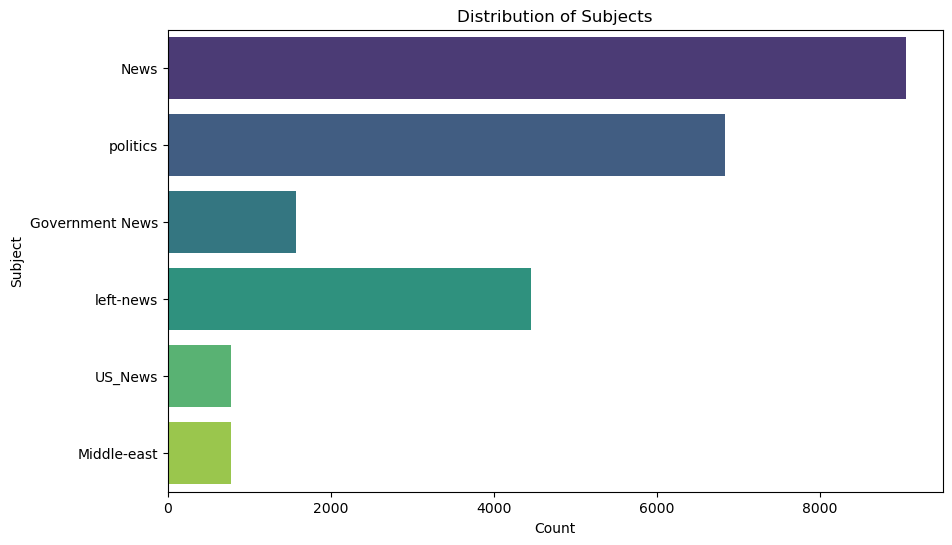

In [28]:
# Distribution of subjects
plt.figure(figsize=(10,6))
sns.countplot(y='subject', data=data, palette='viridis')
plt.title('Distribution of Subjects')
plt.xlabel('Count')
plt.ylabel('Subject')
plt.show()

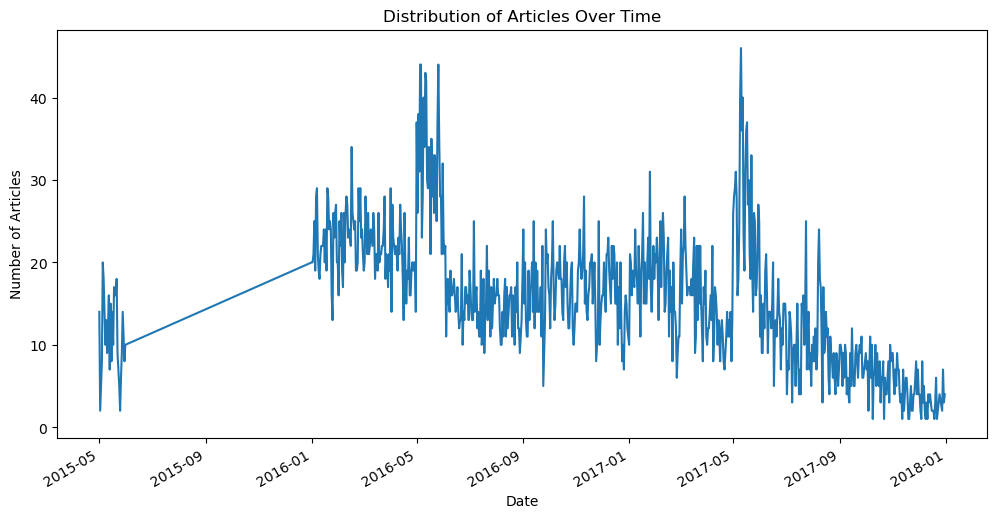

In [31]:
# Attempt to convert 'date' column to datetime, handling errors
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Drop rows where date conversion failed (resulting in NaT)
data = data.dropna(subset=['date'])

# Extract year and month from the 'date' column
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month

# Plot distribution of articles over time
plt.figure(figsize=(12, 6))
data['date'].value_counts().sort_index().plot()
plt.title('Distribution of Articles Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

In [32]:
# Cramér's V function
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# Calculate Cramér's V for 'subject' and 'title'
cramers_v_value = cramers_v(data['subject'], data['title'])
print(f"\nCramér's V between 'subject' and 'title': {cramers_v_value}")

# Chi-square test
contingency_table = pd.crosstab(data['subject'], data['title'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"\nChi-square test between 'subject' and 'title': chi2={chi2}, p={p}")


Cramér's V between 'subject' and 'title': 0.7529391650838195

Chi-square test between 'subject' and 'title': chi2=33640.87770405785, p=1.0


In [33]:
# Create a contingency table
contingency_table = pd.crosstab(data['subject'], data['title'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

Contingency Table:
title            \r\r\r\r\r\r\r\nDonald Trump Gets His A** Handed To Him By A 10-Year-Old Girl (VIDEO)\r\r\r\r\r\r\r\n  \
subject                                                                                                                  
Government News                                                  0                                                       
Middle-east                                                      0                                                       
News                                                             1                                                       
US_News                                                          0                                                       
left-news                                                        0                                                       
politics                                                         0                                                       

titl